# Empirical Findings 

## Compute the Term Premium
For the ACM Model we have developed, we can compute directly the term premium via an iterating process per the ACM paper which states that the risk premium investors demand for holding a bond with n months to maturity for one month can be written as follows:

$$ premium(n) = \hat \Beta_{n-1}(\hat \lambda_0 + \hat \lambda_1 X_t) - \frac{1}{2}(\hat \Beta '_{n-1} \hat \Sigma \Beta_{n - 1} + \hat \sigma ^2 )$$

We obtain the maturity = 10y term premium and store them in the file.

## Explorations

What are the possible relationship between term premia and macro factors? We can gain some insight from finance literature. 

Gurkaynak, Sack, and Wright (2006) paper, titled "The U.S. Treasury Yield Curve: 1961 to the Present " examines the behavior of the U.S. Treasury yield curve. They find that the changes in the slope of the yield curve are informative about changes in monetary policy. They also find evidence of a positive inflation risk premium, meaning that investors demand higher compensation for inflation risk, and a positive real interest rate, meaning that investors demand compensation for the opportunity cost of holding bonds.

Their work inspires us to take a closer look at how changes in inflation and interest rate may affect term premium.
We first plot 10y term premium and these factors together.




In [159]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


ffr = pd.read_csv("FEDFUNDS.csv")
inflation = pd.read_csv("PCEPI.csv")
bkevinfla = pd.read_csv("T10YIE.csv")
tp10 = pd.read_csv("TP10y.csv")

ffr['time'] = np.array([0] * ffr.shape[0]) # ends at 20230401
inflation['time'] = np.array([0] * inflation.shape[0]) # ends at 20230301
bkevinfla['time'] = np.array([0] * bkevinfla.shape[0]) # ends at 20230401
tp10['time'] = np.array([0] * tp10.shape[0]) # ends at 20230331

for i in range(ffr.shape[0]):
    ffr.iloc[i, 2] = datetime.strptime(ffr.iloc[i, 0], '%Y-%m-%d')
for j in range(inflation.shape[0]):
    inflation.iloc[j, 2] = datetime.strptime(inflation.iloc[j, 0], '%Y-%m-%d')
for k in range(bkevinfla.shape[0]):
    bkevinfla.iloc[k, 2] = datetime.strptime(bkevinfla.iloc[k, 0], '%d/%m/%Y')
for k in range(tp10.shape[0]):
    tp10.iloc[k, 2] = datetime.strptime(tp10.iloc[k, 0], '%d-%b-%Y')


begin = datetime(2003, 1, 1, 0, 0)
end = datetime(2023, 3, 1, 0, 30)

ffr = ffr[ffr['time'] >= begin]
ffr = ffr[ffr['time'] <= end]
inflation = inflation[inflation['time'] >= begin]
inflation = inflation[inflation['time'] <= end]
bkevinfla = bkevinfla[bkevinfla['time'] >= begin]
bkevinfla = bkevinfla[bkevinfla['time'] <= end]
tp10 = tp10[tp10['time'] >= begin]
tp10 = tp10[tp10['time'] <= end]

data1 = pd.DataFrame(ffr['time'])
data1 = data1.iloc[:-1, 0:]
data1['term_premium'] = np.array(tp10['ACMTP10'])
data1['Inflation'] = np.array(inflation['PCEPI_CH1'])[:-1]

data2 = pd.DataFrame(ffr['FEDFUNDS'])
data2 = data2.iloc[:-1, 0:]
data2['term_premium'] = np.array(tp10['ACMTP10'])
data2['time'] = np.array(ffr['time'])[:-1] 

data2.tail()

,FEDFUNDS,term_premium,time
819,3.08,-0.138921,2022-10-01
820,3.78,-0.679775,2022-11-01
821,4.10,-0.511421,2022-12-01
822,4.33,-0.727449,2023-01-01
823,4.57,-0.425672,2023-02-01


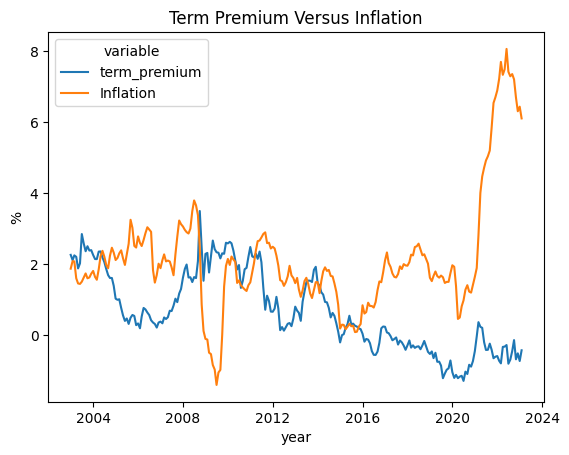

In [160]:
sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data1, id_vars=['time']))
plt.xlabel('year')
plt.ylabel('%')
plt.title('Term Premium Versus Inflation')
plt.show()


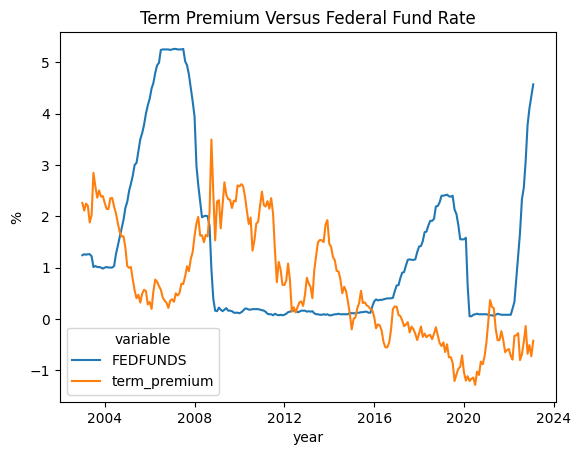

In [161]:
sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data2, id_vars=['time']))
plt.xlabel('year')
plt.ylabel('%')
plt.title('Term Premium Versus Federal Fund Rate')
plt.show()

We can see from the lot that no obvious patterns of relationship can be observed between term premia and inflation or interest rate.

We think of volatilty and hope to find a pattern.

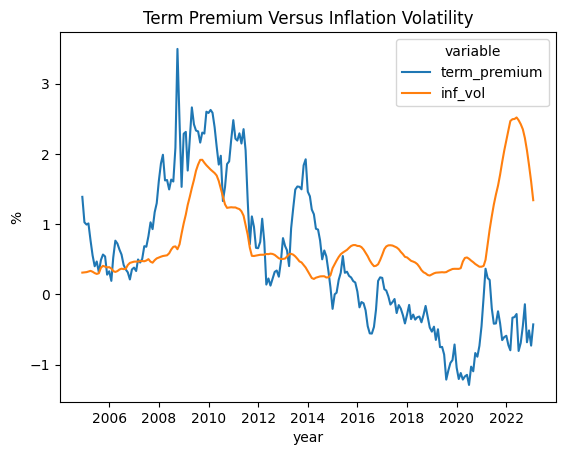

In [162]:
s1 = data1['Inflation']
data3 = pd.DataFrame(data1.iloc[23:, 0:2])
data3['inf_vol'] = s1.rolling(24).std()


sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data3, id_vars=['time']))
plt.xlabel('year')
plt.ylabel('%')
plt.title('Term Premium Versus Inflation Volatility')
plt.show()

2004 - 2022 data displays clear positive relationship  between 10y term premium and volatility of inflation in the U.S.(gauged by the Fed’s Personal Consumption Expenditure Index). 

This validates classic term premium theory which suggests that term premium comprise of 2 parts: the real term premium and the inflation premium. The inflation premium represents the compensation that investors demand for inflation risk. 

When inflation volatility increases, investors require a higher term premium to compensate for the additional risks.This causes the 10-year term premium to rise.


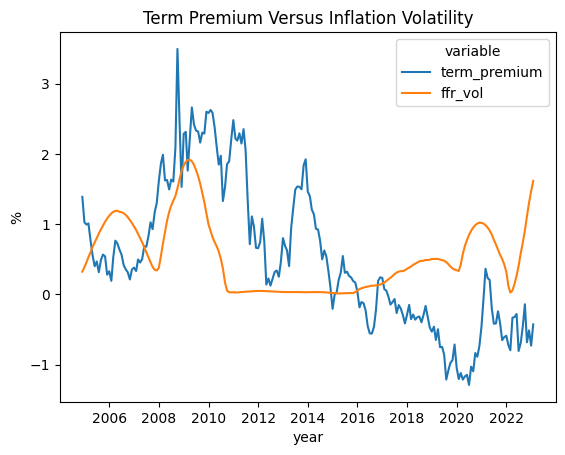

In [163]:
s2 = data2['FEDFUNDS']
data4 = pd.DataFrame(data2.iloc[23:, [1, 2]])
data4['ffr_vol'] = s2.rolling(24).std()

sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(data4, id_vars=['time']))
plt.xlabel('year')
plt.ylabel('%')
plt.title('Term Premium Versus Inflation Volatility')
plt.show()

2004 - 2022 data also displays clear positive relationship  between 10y term premium and volatility of Federal Fund Rate. This is because higher volatility in the federal funds rate can increase the uncertainty and risk associated with holding longer-term bonds.


When the federal funds rate is volatile, it can create uncertainty about the expected path of future short-term interest rates, which can in turn increase uncertainty about the future value of longer-term bonds. This uncertainty can lead investors to demand higher compensation for holding longer-term bonds, which can lead to an increase in term premia.
